In [15]:
import requests
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import json
from config import weather_api_key

In [16]:
url = "https://api.openweathermap.org/data/3.0/onecall/timemachine?"
units = "imperial"

# Reading CSV Data

In [17]:
# Reading the CSV
uber_csv = pd.read_csv("Resources/uber.csv")

uber_df = pd.DataFrame(uber_csv)

uber_df.head()



,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [18]:
# Renaming the headers
uber_df.rename(columns = {'Unnamed: 0':'ID', 'key':'N/A', 'fare_amount':'Charge', "pickup_datetime":"Pickup Time",  "pickup_longitude": "Pickup Lon", "pickup_latitude":"Pickup Lat",  
                          "dropoff_longitude": "Dropoff Lon", "dropoff_latitude": "Dropoff Lat", "passenger_count": "Passenger Count"}, inplace = True)

uber_df.head()



,ID,N/A,Charge,Pickup Time,Pickup Lon,Pickup Lat,Dropoff Lon,Dropoff Lat,Passenger Count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [19]:
# Grabbing a sample of the data
uber_df3 = uber_df.sample(n=500)
uber_df3.head()

,ID,N/A,Charge,Pickup Time,Pickup Lon,Pickup Lat,Dropoff Lon,Dropoff Lat,Passenger Count
138285,255755,2011-08-20 03:02:00.00000042,14.50,2011-08-20 03:02:00 UTC,-73.999910,40.718183,-73.977532,40.784513,2
70567,46313624,2009-05-21 08:32:37.0000007,29.85,2009-05-21 08:32:37 UTC,-73.885273,40.772765,-73.973114,40.758444,1
113119,18866625,2010-09-08 07:19:25.0000002,3.70,2010-09-08 07:19:25 UTC,-73.966533,40.754462,-73.977157,40.758735,1
29124,1188000,2010-06-08 23:11:00.000000180,4.10,2010-06-08 23:11:00 UTC,-73.975705,40.748777,-73.978260,40.741437,1
37734,14914224,2010-04-18 15:26:10.0000001,4.90,2010-04-18 15:26:10 UTC,-73.993940,40.748000,-73.996426,40.739656,1


# Formatting Data

In [20]:
# Formatting the date step one
uber_df3['Date Formatted'] = (pd.to_datetime(uber_df3['Pickup Time'], yearfirst=True, utc=True)) 
 
uber_df3.head()


,ID,N/A,Charge,Pickup Time,Pickup Lon,Pickup Lat,Dropoff Lon,Dropoff Lat,Passenger Count,Date Formatted
138285,255755,2011-08-20 03:02:00.00000042,14.50,2011-08-20 03:02:00 UTC,-73.999910,40.718183,-73.977532,40.784513,2,2011-08-20 03:02:00+00:00
70567,46313624,2009-05-21 08:32:37.0000007,29.85,2009-05-21 08:32:37 UTC,-73.885273,40.772765,-73.973114,40.758444,1,2009-05-21 08:32:37+00:00
113119,18866625,2010-09-08 07:19:25.0000002,3.70,2010-09-08 07:19:25 UTC,-73.966533,40.754462,-73.977157,40.758735,1,2010-09-08 07:19:25+00:00
29124,1188000,2010-06-08 23:11:00.000000180,4.10,2010-06-08 23:11:00 UTC,-73.975705,40.748777,-73.978260,40.741437,1,2010-06-08 23:11:00+00:00
37734,14914224,2010-04-18 15:26:10.0000001,4.90,2010-04-18 15:26:10 UTC,-73.993940,40.748000,-73.996426,40.739656,1,2010-04-18 15:26:10+00:00


In [21]:
# Final Formatted date added to dataframe
uber_df3['Date Formatted Final'] = (uber_df3["Date Formatted"] - pd.Timestamp("1970-01-01", tz="UTC")) // pd.Timedelta('1s')

uber_df3.head()

,ID,N/A,Charge,Pickup Time,Pickup Lon,Pickup Lat,Dropoff Lon,Dropoff Lat,Passenger Count,Date Formatted,Date Formatted Final
138285,255755,2011-08-20 03:02:00.00000042,14.50,2011-08-20 03:02:00 UTC,-73.999910,40.718183,-73.977532,40.784513,2,2011-08-20 03:02:00+00:00,1313809320
70567,46313624,2009-05-21 08:32:37.0000007,29.85,2009-05-21 08:32:37 UTC,-73.885273,40.772765,-73.973114,40.758444,1,2009-05-21 08:32:37+00:00,1242894757
113119,18866625,2010-09-08 07:19:25.0000002,3.70,2010-09-08 07:19:25 UTC,-73.966533,40.754462,-73.977157,40.758735,1,2010-09-08 07:19:25+00:00,1283930365
29124,1188000,2010-06-08 23:11:00.000000180,4.10,2010-06-08 23:11:00 UTC,-73.975705,40.748777,-73.978260,40.741437,1,2010-06-08 23:11:00+00:00,1276038660
37734,14914224,2010-04-18 15:26:10.0000001,4.90,2010-04-18 15:26:10 UTC,-73.993940,40.748000,-73.996426,40.739656,1,2010-04-18 15:26:10+00:00,1271604370


In [22]:
#Creating the clean dataframe
clean_df = uber_df3[["ID", "Charge", "Pickup Lon", "Pickup Lat", "Dropoff Lon", "Dropoff Lat", "Passenger Count", "Date Formatted Final" ]]


clean_df.head()

,ID,Charge,Pickup Lon,Pickup Lat,Dropoff Lon,Dropoff Lat,Passenger Count,Date Formatted Final
138285,255755,14.50,-73.999910,40.718183,-73.977532,40.784513,2,1313809320
70567,46313624,29.85,-73.885273,40.772765,-73.973114,40.758444,1,1242894757
113119,18866625,3.70,-73.966533,40.754462,-73.977157,40.758735,1,1283930365
29124,1188000,4.10,-73.975705,40.748777,-73.978260,40.741437,1,1276038660
37734,14914224,4.90,-73.993940,40.748000,-73.996426,40.739656,1,1271604370


# Gathering info for our hypothesis tests

In [23]:
# Making the list for data 
uber_data = []

# Looping through the data
for i, row in clean_df.iterrows():

    # Gathering the latitude, longitude, and pickup time
    lat = row['Pickup Lat']
    lon = row['Pickup Lon']
    date = row['Date Formatted Final'].astype(int)
    
    # Making the query for the search using the varibles
    query_url = f"{url}lat={lat}&lon={lon}&dt={date}&appid={weather_api_key}&units={units}"
    
    # Getting the info from the api
    response = requests.get(query_url).json()

    # Gathering variables for statistics
    temp = response['data'][0]['temp']
    hum = response['data'][0]['humidity']
    desc = response['data'][0]['weather'][0]['main']

    # Placing variables into a dictionary
    uber_data.append({"Pickup Lat": lat,
                            "Temp (F)": temp,
                            "Humidity %": hum,
                            "Description": desc
    })


    
    
   

In [24]:
query_url=f"{url}lat={lat}&lon={lon}&dt={date}&appid={weather_api_key}&units={units}"
response = requests.get(query_url).json()
print(response)




{'lat': 40.755, 'lon': -73.984, 'timezone': 'America/New_York', 'timezone_offset': -14400, 'data': [{'dt': 1245366066, 'sunrise': 1245317059, 'sunset': 1245371399, 'temp': 63.19, 'feels_like': 63.73, 'pressure': 1011, 'humidity': 96, 'dew_point': 62.04, 'clouds': 100, 'visibility': 6437, 'wind_speed': 9.17, 'wind_deg': 160, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}]}]}


In [25]:
# Making the weather dataframe
weather_df = pd.DataFrame(uber_data)

weather_df.head()

,Pickup Lat,Temp (F),Humidity %,Description
0,40.718183,67.53,96,Mist
1,40.772765,64.00,44,Clear
2,40.754462,71.89,78,Clear
3,40.748777,66.36,47,Clouds
4,40.748000,52.29,46,Clouds


In [26]:
# Merging the data for statistical use
final_df = clean_df.merge(weather_df, on = "Pickup Lat")

final_df.head()

,ID,Charge,Pickup Lon,Pickup Lat,Dropoff Lon,Dropoff Lat,Passenger Count,Date Formatted Final,Temp (F),Humidity %,Description
0,255755,14.50,-73.999910,40.718183,-73.977532,40.784513,2,1313809320,67.53,96,Mist
1,46313624,29.85,-73.885273,40.772765,-73.973114,40.758444,1,1242894757,64.00,44,Clear
2,18866625,3.70,-73.966533,40.754462,-73.977157,40.758735,1,1283930365,71.89,78,Clear
3,1188000,4.10,-73.975705,40.748777,-73.978260,40.741437,1,1276038660,66.36,47,Clouds
4,14914224,4.90,-73.993940,40.748000,-73.996426,40.739656,1,1271604370,52.29,46,Clouds


In [27]:
desc_group = final_df.groupby(['Description']).mean()
desc_group = desc_group.drop(columns=['ID', 'Pickup Lon', 'Pickup Lat',
'Dropoff Lon', 'Dropoff Lat', 'Date Formatted Final'])
desc_group.head(20)

,Charge,Passenger Count,Temp (F),Humidity %
Description,,,,
Clear,12.242465,1.646512,53.556233,50.618605
Clouds,12.024645,1.672131,58.430710,61.622951
Fog,6.100000,1.000000,52.405000,88.000000
Haze,13.372727,1.454545,60.680909,73.454545
Mist,11.772791,1.627907,55.579767,89.906977
Rain,12.242055,1.931507,61.030137,81.123288
Snow,9.933333,1.222222,27.542222,74.111111


In [28]:
# Create temp bins
bins = [0, 19.9, 39.9, 59.9, 79.9, 99.9, 100]


# Create names for the bins
temp_names = ['0-19','20-39','40-59','60-79','80-99','Over 100']

In [40]:
# Create new data frame
final_df['Temp Summary'] = pd.cut(final_df['Temp (F)'], bins, labels=temp_names)


final_df

final_df.to_csv("Resources/final_df.csv")


In [30]:
weather_labels = final_df["Description"].unique()
weather_count = final_df["Description"].value_counts()
weather_count

Clear     215
Clouds    183
Rain       73
Mist       43
Haze       11
Snow        9
Fog         2
Name: Description, dtype: int64

# Graphing the data
Now we must take a closer look to understand this data

In [31]:
# Creating a linear regression fuction
def lregress(x, y, var):
    
    res = stats.linregress(x, y)

    print(f"R-squared: {res.rvalue**2:.6f}")

    plt.scatter(x, y, marker="d", color="red", label= "Data")
    plt.plot(x, res.intercept + res.slope*x, label = "Regression Line")
    plt.title("Linear Regression")
    plt.xlabel("Latitude")
    plt.ylabel(f"{var}")
    plt.legend()
    plt.show()

## Weather vs. Uber Rides



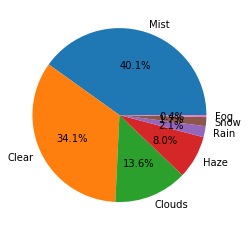

In [32]:
plt.pie(weather_count, labels = weather_labels, autopct = "%1.1f%%")

# Save Figure in png file inside Resources Folder
plt.savefig("Resources/pie_chart.png")


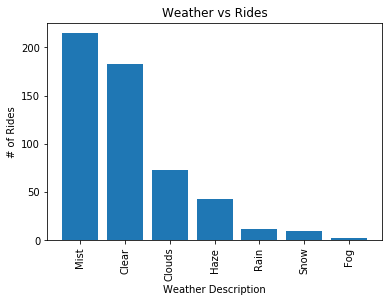

In [33]:
plt.bar(weather_labels, weather_count)
plt.title("Weather vs Rides")
plt.xlabel("Weather Description")
plt.ylabel("# of Rides")
plt.xticks(rotation = 90)

# Save Figure in png file inside Resources folder
plt.savefig("Resources/WeathervsRides.png")

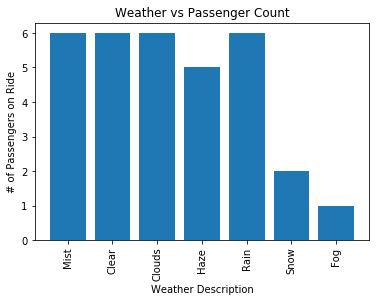

In [34]:
plt.bar(final_df["Description"], final_df["Passenger Count"])
plt.title("Weather vs Passenger Count")
plt.xlabel("Weather Description")
plt.ylabel("# of Passengers on Ride")
plt.xticks(rotation = 90)

# Save Figure in png file inside Resources Folder
plt.savefig("Resources/WeathervsPassengerCount.png")


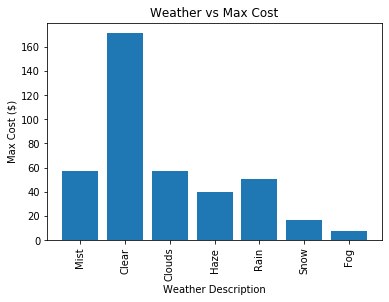

In [35]:
plt.bar(final_df["Description"], final_df["Charge"])
plt.title("Weather vs Max Cost")
plt.xlabel("Weather Description")
plt.ylabel("Max Cost ($)")
plt.xticks(rotation = 90)

# Save Figure in png file inside Resources Folder
plt.savefig("Resources/WeathervsMaxCost.png")

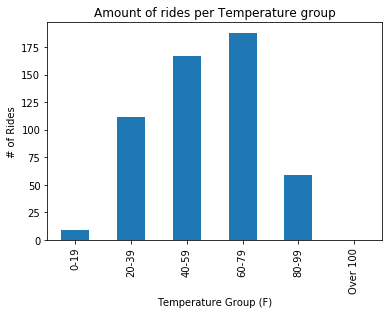

In [36]:
final_df["Temp Summary"].value_counts().sort_index().plot(kind = "bar")
plt.title("Amount of rides per Temperature group")
plt.xlabel("Temperature Group (F)")
plt.ylabel("# of Rides")

# Save Figure in png file inside Resources Folder
plt.savefig("Resources/RidesvsTemp.png")

R-squared: 0.029951


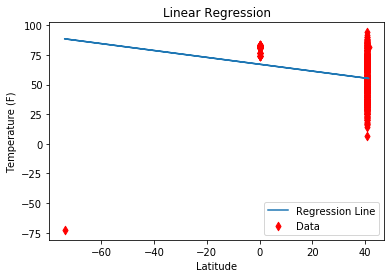

In [37]:
lregress(final_df["Pickup Lat"], final_df["Temp (F)"], "Temperature (F)")

# Save Figure in png file inside Resources Folder
#plt.savefig("Resources/LinearRegressionlattemp.png")

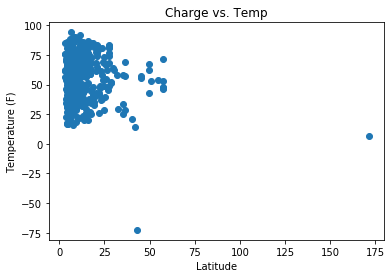

In [38]:
plt.scatter(final_df["Charge"], final_df["Temp (F)"])
plt.title("Charge vs. Temp")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

# Save Figure in png file inside Resources Folder
plt.savefig("Resources/chargevsTemp.png")

R-squared: 0.008824


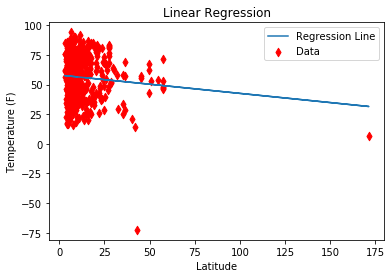

In [39]:
lregress(final_df["Charge"], final_df["Temp (F)"], "Temperature (F)")

# Save Figure in png file inside Resources Folder
#plt.savefig("Resources/LinearRegressionchargetemp.png")